In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import load_diabetes, load_breast_cancer, load_phishing, load_australian, load_mushrooms, load_german, load_w3a
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_11488\2675169415.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
kdiagnostic = 200
C = 1
ktuning = 400

# Diabetes

In [3]:
data_diab = load_diabetes()

________________________________________________________________________________
[Memory] Calling load_datasets.load_diabetes...
load_diabetes()
X_train = (614, 9), y_train = (614,)
X_test = (154, 9), y_test = (154,)
Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}
sklearn train score: 0.762215
sklearn test score: 0.753247
sklearn sol norm: 4.211890391402936
____________________________________________________load_diabetes - 0.0s, 0.0min


In [4]:
#CDiab = 1
MDiab = 16
#kDiab = 200
print(f"Iterations: {data_diab[1].size / MDiab}")

Iterations: 38.375


## Benchmark

In [5]:
benchDiab = run_bench(data_diab, C)

benchDiab_data = optim_bench(benchDiab)

## SGD

In [6]:
# BatchGD-Fixed
batchfixed_diab = run_solvers("SGD-Fixed", C, data_diab, kdiagnostic, data_diab[1].size, (1, 0.1, 0.01))

In [7]:
# SGD-Fixed
sgdfixed_diab = run_solvers("SGD-Fixed", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01))

In [8]:
# SGD-Decreasing
sgddecre_diab = run_solvers("SGD-Decreasing", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01))

In [9]:
# SGDM
sgdm_diab = run_solvers("SGDM", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# SGD-Armijo
sgdarmijo_diab = run_solvers("SGD-Armijo", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01))

In [11]:
# MSL-SGDM-C
mslc_diab = run_solvers("MSL-SGDM-C", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [12]:
# MSL-SGDM-R
mslr_diab = run_solvers("MSL-SGDM-R", C, data_diab, kdiagnostic, MDiab, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [13]:
modelsDiab_data = optim_data(batchfixed_diab + sgdfixed_diab + sgddecre_diab + sgdm_diab + sgdarmijo_diab + mslc_diab + mslr_diab)

## Summary

In [14]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,1.328870e-06,NaN,5,0.653094,0.642857,0.193877
3,SGD-Fixed,1,614.0,1.00,0.0,0.662128,2.137533e-16,0.040876,200,0.653094,0.642857,0.193877
4,SGD-Fixed,1,614.0,0.10,0.0,0.662128,9.497692e-10,0.022013,200,0.653094,0.642857,0.193877
2,CG,1,NaN,NaN,NaN,0.662128,2.752638e-06,NaN,6,0.653094,0.642857,0.193876
0,L-BFGS-B,1,NaN,NaN,NaN,0.662128,1.367774e-05,NaN,6,0.653094,0.642857,0.193873
10,SGD-Decreasing,1,16.0,0.10,0.0,0.662128,1.514609e-04,0.468700,200,0.653094,0.642857,0.193951
9,SGD-Decreasing,1,16.0,0.50,0.0,0.662128,2.652511e-04,0.487473,200,0.653094,0.642857,0.193964
8,SGD-Fixed,1,16.0,0.01,0.0,0.662131,3.279122e-03,0.484315,200,0.653094,0.642857,0.192175
13,SGDM,1,16.0,0.10,0.9,0.662173,1.264710e-02,0.484327,200,0.653094,0.642857,0.187576
14,SGDM,1,16.0,0.01,0.9,0.662620,3.166998e-02,0.534808,200,0.653094,0.642857,0.191079


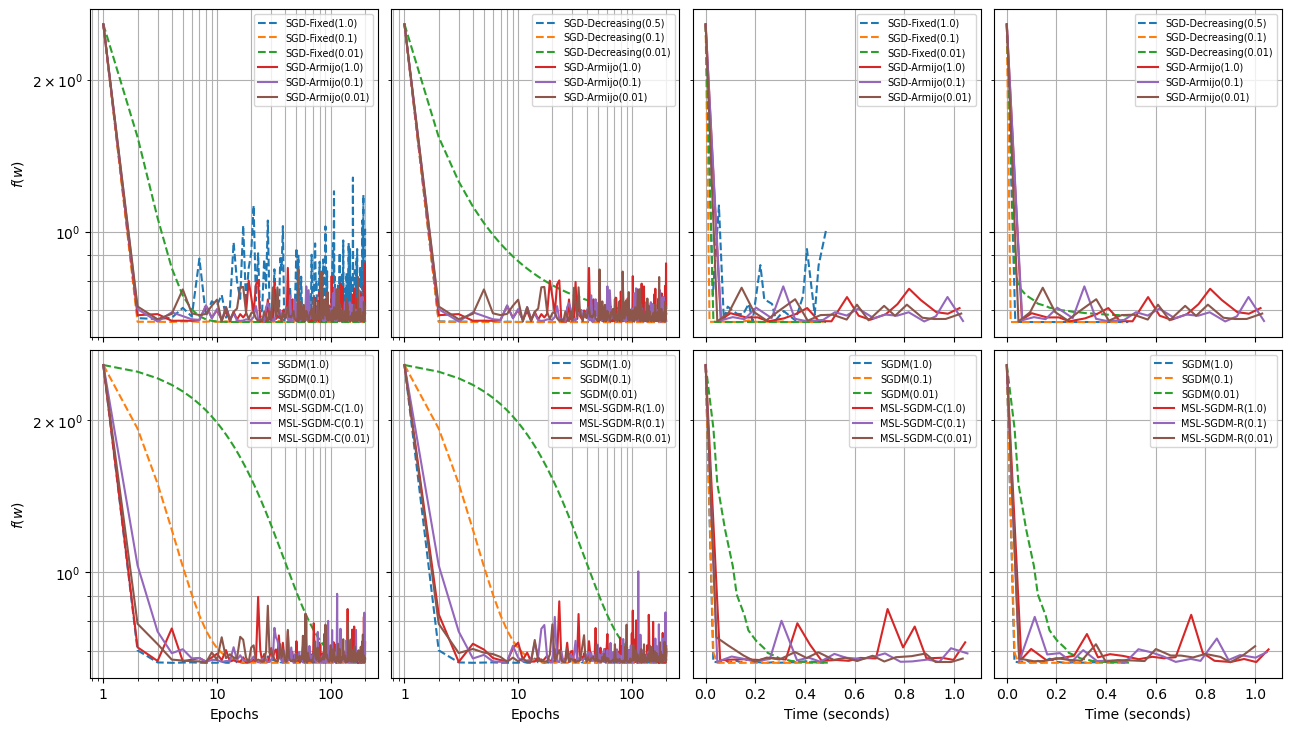

In [18]:
diagnostic(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-diagnostic.pdf")

## Fine-tuning

In [19]:
batchfixed_diab1 = LogisticRegression("SGD-Fixed", C).fit(data_diab, ktuning, data_diab[1].size, 0.75, stop=1)

In [20]:
sgdfixed_diab1 = LogisticRegression("SGD-Fixed", C).fit(data_diab, ktuning, MDiab, 0.005, stop=1)

In [21]:
sgddecre_diab1 = LogisticRegression("SGD-Decreasing", C).fit(data_diab, ktuning, MDiab, 1, stop=1)

In [22]:
sgdm_diab1 = LogisticRegression("SGDM", C).fit(data_diab, ktuning, MDiab, 0.05, 0.9, stop=1)

In [27]:
sgdarmijo_diab1 = LogisticRegression("SGD-Armijo", C).fit(data_diab, ktuning, MDiab, 1, stop=1)

In [28]:
mslc_diab1 = LogisticRegression("MSL-SGDM-C", C).fit(data_diab, ktuning, MDiab, 1, 0.9, stop=1)

In [29]:
mslr_diab1 = LogisticRegression("MSL-SGDM-R", C).fit(data_diab, ktuning, MDiab, 1, 0.9, stop=1)

In [30]:
fine_diab_data = optim_data([batchfixed_diab1, sgdfixed_diab1, sgddecre_diab1, sgdm_diab1, sgdarmijo_diab1, mslc_diab1, mslr_diab1])

test_diab = models_summary(fine_diab_data, benchDiab_data)
test_diab.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000002,NaN,5,0.653094,0.642857,0.193877
2,CG,1,NaN,NaN,NaN,0.662128,0.000012,NaN,10,0.653094,0.642857,0.193878
0,L-BFGS-B,1,NaN,NaN,NaN,0.662128,0.000012,NaN,6,0.653094,0.642857,0.193875
3,SGD-Fixed,1,614.0,0.750,0.0,0.662128,0.000314,0.000000,7,0.653094,0.642857,0.193725
6,SGDM,1,16.0,0.050,0.9,0.662128,0.000713,0.872056,116,0.653094,0.642857,0.193831
4,SGD-Fixed,1,16.0,0.005,0.0,0.662128,0.000857,0.352187,46,0.653094,0.642857,0.193836
5,SGD-Decreasing,1,16.0,1.000,0.0,0.662128,0.000986,0.707022,95,0.653094,0.642857,0.194217
8,MSL-SGDM-C,1,16.0,1.000,0.9,0.666222,0.114801,6.066247,400,0.656352,0.642857,0.160211
9,MSL-SGDM-R,1,16.0,1.000,0.9,0.669933,0.157065,6.057386,400,0.659609,0.636364,0.163960
7,SGD-Armijo,1,16.0,1.000,0.0,0.674488,0.201404,5.957844,400,0.680782,0.675325,0.153849


In [24]:
print(test_diab[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 6 & NaN & 0.662128 & 0.000012 & 0.642857 \\
Newton-CG & NaN & 5 & NaN & 0.662128 & 0.000002 & 0.642857 \\
CG & NaN & 10 & NaN & 0.662128 & 0.000012 & 0.642857 \\
SGD-Fixed & 0.750000 & 7 & 0.000000 & 0.662128 & 0.000314 & 0.642857 \\
SGD-Fixed & 0.005000 & 46 & 0.024848 & 0.662128 & 0.000857 & 0.642857 \\
SGD-Decreasing & 1.000000 & 95 & 0.050892 & 0.662128 & 0.000986 & 0.642857 \\
SGDM & 0.050000 & 116 & 0.065043 & 0.662128 & 0.000713 & 0.642857 \\
SGD-Armijo & 0.050000 & 400 & 0.692054 & 0.664498 & 0.070782 & 0.642857 \\
MSL-SGDM-C & 0.090000 & 400 & 0.753293 & 0.667131 & 0.124277 & 0.642857 \\
MSL-SGDM-R & 0.090000 & 400 & 0.731473 & 0.683680 & 0.270930 & 0.642857 \\
\bottomrule
\end{tabular}



# Breast cancer

In [25]:
data_breast = load_breast_cancer()

X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}
sklearn train score: 0.972527
sklearn test score: 0.948905
sklearn sol norm: 4.617507942191202


In [26]:
#CBreast = 1
MBreast = 8
#kBreast = 200
print(f"Iterations: {data_breast[1].size / MBreast}")

Iterations: 68.25


## Benchmark

In [27]:
benchBreast = run_bench(data_breast, C)

benchBreast_data = optim_bench(benchBreast)

## SGD

In [28]:
# BatchGD-Fixed
batchfixed_breast = run_solvers("SGD-Fixed", C, data_breast, kdiagnostic, data_breast[1].size, (1, 0.1, 0.01))

In [29]:
# SGD-Fixed
sgdfixed_breast = run_solvers("SGD-Fixed", C, data_breast, kdiagnostic, MBreast, (0.5, 0.1, 0.01))

In [30]:
# SGD-Decreasing
sgddecre_breast = run_solvers("SGD-Decreasing", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01))

In [31]:
# SGDM
sgdm_breast = run_solvers("SGDM", C, data_breast, kdiagnostic, MBreast, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [32]:
# SGD-Armijo
sgdarmijo_breast = run_solvers("SGD-Armijo", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01))

In [33]:
# MSL-SGDM-C
mslc_breast = run_solvers("MSL-SGDM-C", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [34]:
# MSL-SGDM-R
mslr_breast = run_solvers("MSL-SGDM-R", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [35]:
modelsBreast_data = optim_data(batchfixed_breast + sgdfixed_breast + sgddecre_breast + sgdm_breast + sgdarmijo_breast + mslc_breast + mslr_breast)

## Summary

In [36]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="l2-Loss")

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,546.0,0.10,0.0,0.492561,1.621078e-09,0.028691,200,0.902930,0.817518,0.447458
1,Newton-CG,1,NaN,NaN,NaN,0.492561,2.978439e-05,NaN,6,0.902930,0.817518,0.447458
2,CG,1,NaN,NaN,NaN,0.492561,1.215857e-06,NaN,8,0.902930,0.817518,0.447458
0,L-BFGS-B,1,NaN,NaN,NaN,0.492561,3.306913e-06,NaN,9,0.902930,0.817518,0.447459
10,SGD-Decreasing,1,8.0,0.10,0.0,0.492561,1.923749e-04,0.167166,200,0.902930,0.817518,0.447526
14,SGDM,1,8.0,0.01,0.9,0.492565,2.984202e-03,0.189783,200,0.902930,0.817518,0.447623
9,SGD-Decreasing,1,8.0,1.00,0.0,0.492566,4.285426e-03,0.170659,200,0.902930,0.817518,0.448320
13,SGDM,1,8.0,0.10,0.9,0.492569,5.224426e-03,0.200223,200,0.902930,0.817518,0.448744
8,SGD-Fixed,1,8.0,0.01,0.0,0.492577,7.377155e-03,0.171851,200,0.902930,0.817518,0.448495
12,SGDM,1,8.0,0.50,0.9,0.492707,2.178366e-02,0.180281,200,0.901099,0.817518,0.451957


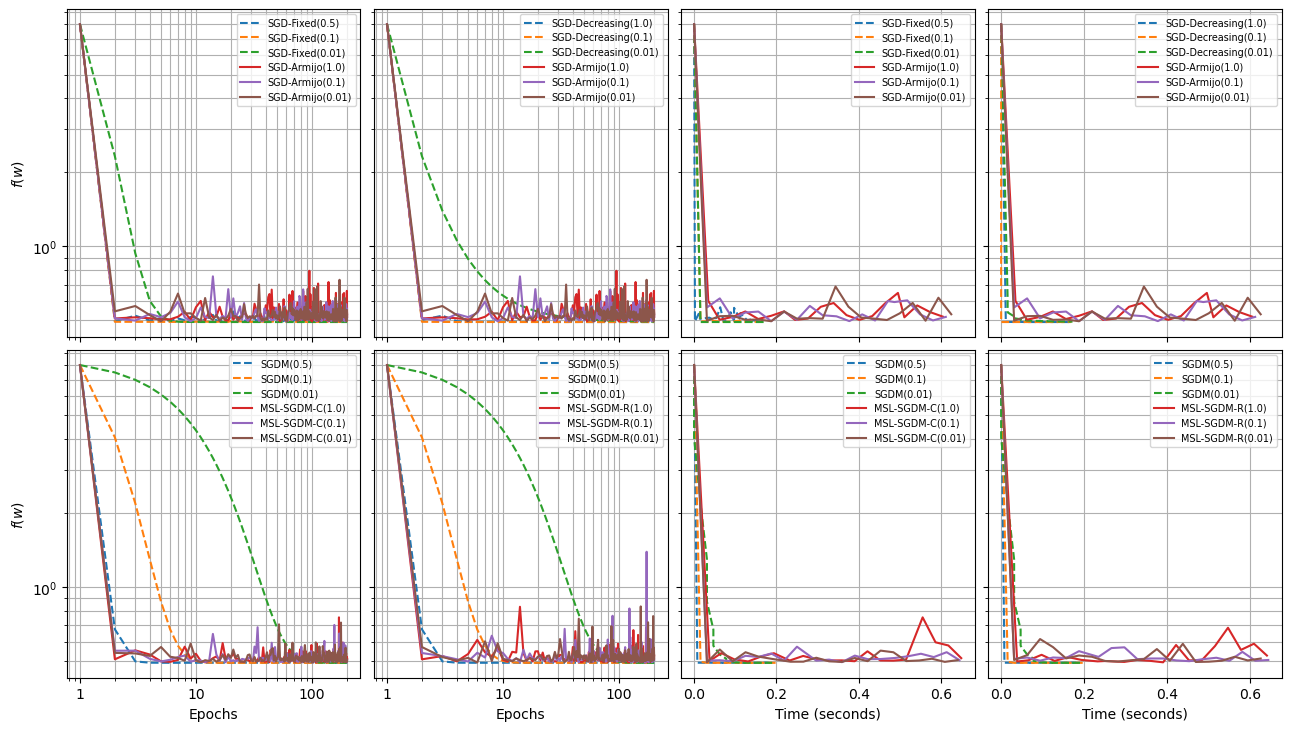

In [37]:
diagnostic(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-diagnostic.pdf")

## Fine-tuning

In [38]:
batchfixed_breast1 = LogisticRegression("SGD-Fixed", C).fit(data_breast, ktuning, data_breast[1].size, 0.75, stop=1)

In [39]:
sgdfixed_breast1 = LogisticRegression("SGD-Fixed", C).fit(data_breast, ktuning, MBreast, 0.005, stop=1)

In [40]:
sgddecre_breast1 = LogisticRegression("SGD-Decreasing", C).fit(data_breast, ktuning, MBreast, 1, stop=1)

In [41]:
sgdm_breast1 = LogisticRegression("SGDM", C).fit(data_breast, ktuning, MBreast, 0.04, 0.9, stop=1)

In [42]:
sgdarmijo_breast1 = LogisticRegression("SGD-Armijo", C).fit(data_breast, ktuning, MBreast, 0.05, stop=1)

In [43]:
mslc_breast1 = LogisticRegression("MSL-SGDM-C", C).fit(data_breast, ktuning, MBreast, 0.5, 0.9, stop=1)

In [44]:
mslr_breast1 = LogisticRegression("MSL-SGDM-R", C).fit(data_breast, ktuning, MBreast, 0.75, 0.9, stop=1)

In [45]:
fine_breast_data = optim_data([batchfixed_breast1, sgdfixed_breast1, sgddecre_breast1, sgdm_breast1, sgdarmijo_breast1, mslc_breast1, mslr_breast1])

test_breast = models_summary(fine_breast_data, benchBreast_data)
test_breast.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,0.000030,NaN,6,0.902930,0.817518,0.447458
2,CG,1,NaN,NaN,NaN,0.492561,0.000001,NaN,8,0.902930,0.817518,0.447458
0,L-BFGS-B,1,NaN,NaN,NaN,0.492561,0.000003,NaN,9,0.902930,0.817518,0.447459
3,SGD-Fixed,1,546.0,0.750,0.0,0.492561,0.000597,0.006754,12,0.902930,0.817518,0.447215
5,SGD-Decreasing,1,8.0,1.000,0.0,0.492561,0.000666,0.135792,156,0.902930,0.817518,0.447586
6,SGDM,1,8.0,0.040,0.9,0.492561,0.000791,0.079274,76,0.902930,0.817518,0.447260
4,SGD-Fixed,1,8.0,0.005,0.0,0.492561,0.000952,0.034304,35,0.902930,0.817518,0.447612
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.512165,0.219396,1.298435,400,0.950549,0.897810,0.504700
9,MSL-SGDM-R,1,8.0,0.750,0.9,0.524434,0.272145,1.275754,400,0.941392,0.861314,0.501854
7,SGD-Armijo,1,8.0,0.050,0.0,0.538378,0.345611,1.229881,400,0.846154,0.781022,0.572323


In [46]:
print(test_breast[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 9 & NaN & 0.492561 & 0.000003 & 0.817518 \\
Newton-CG & NaN & 6 & NaN & 0.492561 & 0.000030 & 0.817518 \\
CG & NaN & 8 & NaN & 0.492561 & 0.000001 & 0.817518 \\
SGD-Fixed & 0.750000 & 12 & 0.006754 & 0.492561 & 0.000597 & 0.817518 \\
SGD-Fixed & 0.005000 & 35 & 0.034304 & 0.492561 & 0.000952 & 0.817518 \\
SGD-Decreasing & 1.000000 & 156 & 0.135792 & 0.492561 & 0.000666 & 0.817518 \\
SGDM & 0.040000 & 76 & 0.079274 & 0.492561 & 0.000791 & 0.817518 \\
SGD-Armijo & 0.050000 & 400 & 1.229881 & 0.538378 & 0.345611 & 0.781022 \\
MSL-SGDM-C & 0.500000 & 400 & 1.298435 & 0.512165 & 0.219396 & 0.897810 \\
MSL-SGDM-R & 0.750000 & 400 & 1.275754 & 0.524434 & 0.272145 & 0.861314 \\
\bottomrule
\end{tabular}



# Phishing

In [15]:
data_phish = load_phishing()

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}
sklearn train score: 0.938263
sklearn test score: 0.934871
sklearn sol norm: 24.265378392894867


In [17]:
#Csvm = 1
Mphish = 128
#ksvm = 200
print(f"Iterations: {data_phish[1].size / Mphish}")

Iterations: 69.09375


## Benchmark

In [5]:
benchphish = run_bench(data_phish, C)

benchphish_data = optim_bench(benchphish)

## SGD

In [18]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, data_phish, kdiagnostic, data_phish[1].size, (1, 0.1, 0.01))

In [19]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, data_phish, kdiagnostic, Mphish, (0.5, 0.1, 0.01))

In [20]:
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, data_phish, kdiagnostic, Mphish, (1, 0.1, 0.01))

In [21]:
# SGDM
sgdm_phish = run_solvers("SGDM", C, data_phish, kdiagnostic, Mphish, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [22]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, data_phish, kdiagnostic, Mphish, (1, 0.1, 0.01))

In [23]:
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, data_phish, kdiagnostic, Mphish, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [24]:
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, data_phish, kdiagnostic, Mphish, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [25]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [26]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
3,SGD-Fixed,1,8844.0,1.00,0.0,0.688678,1.579046e-16,0.343771,200,0.554274,0.567616,0.088571
4,SGD-Fixed,1,8844.0,0.10,0.0,0.688678,3.121932e-09,0.359335,200,0.554274,0.567616,0.088571
1,Newton-CG,1,NaN,NaN,NaN,0.688678,9.115179e-09,NaN,5,0.554274,0.567616,0.088571
10,SGD-Decreasing,1,128.0,0.10,0.0,0.688678,4.982954e-06,1.097156,200,0.554274,0.567616,0.088571
2,CG,1,NaN,NaN,NaN,0.688678,1.911229e-05,NaN,4,0.554274,0.567616,0.088573
0,L-BFGS-B,1,NaN,NaN,NaN,0.688678,2.189414e-05,NaN,5,0.554274,0.567616,0.088567
9,SGD-Decreasing,1,128.0,1.00,0.0,0.688678,3.671575e-04,1.082900,200,0.554274,0.567616,0.088428
16,SGDM,1,128.0,0.10,0.9,0.688678,5.676677e-04,1.098584,200,0.554274,0.567616,0.088756
8,SGD-Fixed,1,128.0,0.01,0.0,0.688679,1.010254e-03,1.097152,200,0.554274,0.567616,0.088186
17,SGDM,1,128.0,0.01,0.9,0.688683,2.991902e-03,1.110912,200,0.554274,0.567616,0.088645


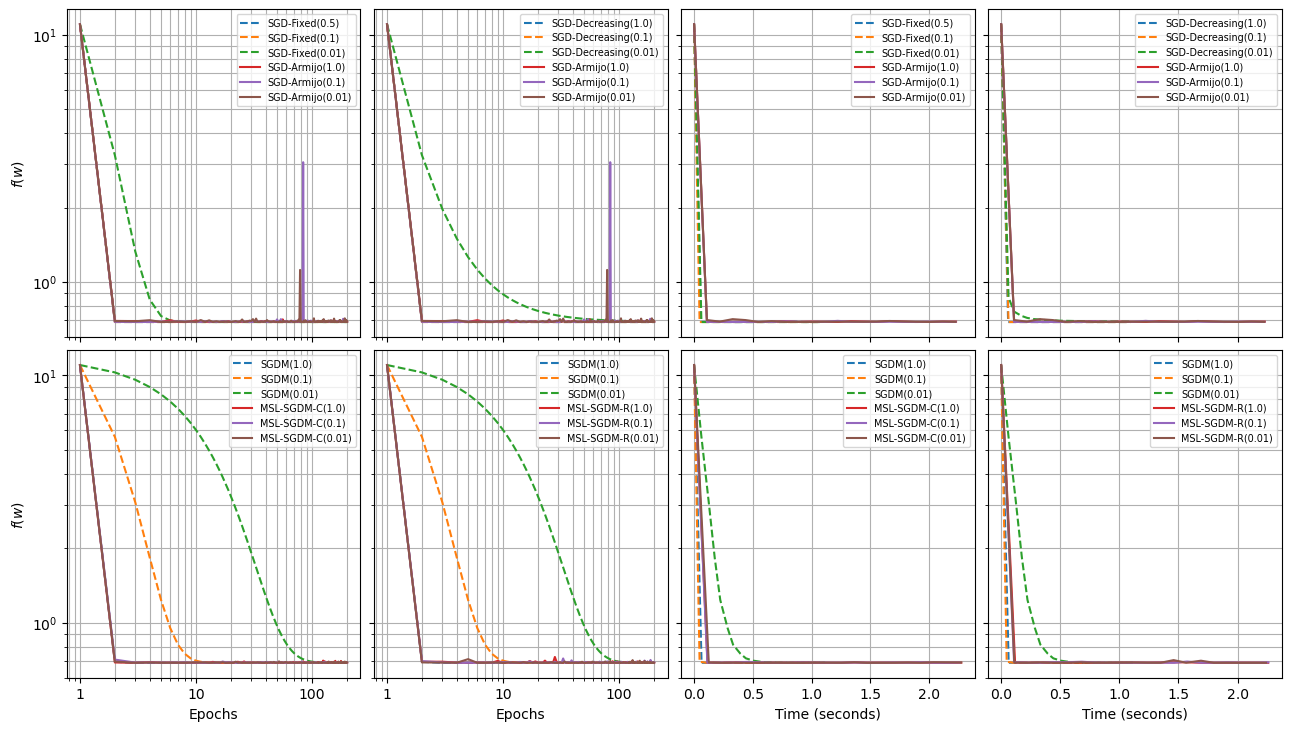

In [27]:
diagnostic(
    optim_data(sgdfixed_phish + sgdarmijo_phish),
    optim_data(sgddecre_phish + sgdarmijo_phish),
    optim_data(sgdm_phish + mslc_phish),
    optim_data(sgdm_phish + mslr_phish),
    benchphish[0])
plt.savefig("./plots/phish-diagnostic.pdf")

## Fine-tuning

In [60]:
batchfixed_svm1 = LogisticRegression("SGD-Fixed", C).fit(data_svm, ktuning, data_svm[1].size, 0.75, stop=1)

In [61]:
sgdfixed_svm1 = LogisticRegression("SGD-Fixed", C).fit(data_svm, ktuning, Msvm, 0.01, stop=1)

In [62]:
sgddecre_svm1 = LogisticRegression("SGD-Decreasing", C).fit(data_svm, ktuning, Msvm, 1, stop=1)

In [63]:
sgdm_svm1 = LogisticRegression("SGDM", C).fit(data_svm, ktuning, Msvm, 0.05, 0.9, stop=1)

In [64]:
sgdarmijo_svm1 = LogisticRegression("SGD-Armijo", C).fit(data_svm, ktuning, Msvm, 0.25, stop=1)

In [65]:
mslc_svm1 = LogisticRegression("MSL-SGDM-C", C).fit(data_svm, ktuning, Msvm, 0.1, 0.9, stop=1)

In [66]:
mslr_svm1 = LogisticRegression("MSL-SGDM-R", C).fit(data_svm, ktuning, Msvm, 0.5, 0.9, stop=1)

In [67]:
fine_svm_data = optim_data([batchfixed_svm1, sgdfixed_svm1, sgddecre_svm1, sgdm_svm1, sgdarmijo_svm1, mslc_svm1, mslr_svm1])

test_svm = models_summary(fine_svm_data, benchSvm_data)
test_svm.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,1.349869e-07,NaN,5,0.653933,0.51675,0.181802
0,L-BFGS-B,1,NaN,NaN,NaN,0.673302,6.524010e-08,NaN,6,0.653933,0.51675,0.181802
2,CG,1,NaN,NaN,NaN,0.673302,2.241634e-06,NaN,6,0.653933,0.51675,0.181801
3,SGD-Fixed,1,3089.0,0.75,0.0,0.673302,4.850913e-04,0.004999,6,0.653933,0.51600,0.181805
6,SGDM,1,32.0,0.05,0.9,0.673303,8.260911e-04,0.053250,35,0.653933,0.51700,0.181441
4,SGD-Fixed,1,32.0,0.01,0.0,0.673303,8.592908e-04,0.022626,9,0.653933,0.51700,0.181506
5,SGD-Decreasing,1,32.0,1.00,0.0,0.673303,9.352571e-04,0.185610,108,0.653610,0.51600,0.182287
9,MSL-SGDM-R,1,32.0,0.50,0.9,0.674019,3.972093e-02,2.778740,400,0.709938,0.60400,0.200604
8,MSL-SGDM-C,1,32.0,0.10,0.9,0.675380,7.759843e-02,2.893821,400,0.647459,0.50000,0.207263
7,SGD-Armijo,1,32.0,0.25,0.0,0.677038,1.059674e-01,2.663571,400,0.824862,0.76350,0.145309


In [68]:
print(test_svm[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 6 & NaN & 0.673302 & 0.000000 & 0.516750 \\
Newton-CG & NaN & 5 & NaN & 0.673302 & 0.000000 & 0.516750 \\
CG & NaN & 6 & NaN & 0.673302 & 0.000002 & 0.516750 \\
SGD-Fixed & 0.750000 & 6 & 0.004999 & 0.673302 & 0.000485 & 0.516000 \\
SGD-Fixed & 0.010000 & 9 & 0.022626 & 0.673303 & 0.000859 & 0.517000 \\
SGD-Decreasing & 1.000000 & 108 & 0.185610 & 0.673303 & 0.000935 & 0.516000 \\
SGDM & 0.050000 & 35 & 0.053250 & 0.673303 & 0.000826 & 0.517000 \\
SGD-Armijo & 0.250000 & 400 & 2.663571 & 0.677038 & 0.105967 & 0.763500 \\
MSL-SGDM-C & 0.100000 & 400 & 2.893821 & 0.675380 & 0.077598 & 0.500000 \\
MSL-SGDM-R & 0.500000 & 400 & 2.778740 & 0.674019 & 0.039721 & 0.604000 \\
\bottomrule
\end{tabular}



# Australian

In [69]:
data_austr = load_australian()

X_train = (552, 15), y_train = (552,)
X_test = (138, 15), y_test = (138,)
Class distribution: {-1.0: 0.5362318840579711, 1.0: 0.463768115942029}
sklearn train score: 0.867754
sklearn test score: 0.862319
sklearn sol norm: 3.4331049997375587


In [70]:
#CAustr = 1
MAustr = 8
#kAustr = 200
print(f"Iterations: {data_austr[1].size / MAustr}")

Iterations: 69.0


## Benchmark

In [71]:
benchAustr = run_bench(data_austr, C)

benchAustr_data = optim_bench(benchAustr)

## SGD

In [72]:
# BatchGD-Fixed
batchfixed_austr = run_solvers("SGD-Fixed", C, data_austr, kdiagnostic, data_austr[1].size, (1, 0.1, 0.01))

In [73]:
# SGD-Fixed
sgdfixed_austr = run_solvers("SGD-Fixed", C, data_austr, kdiagnostic, MAustr, (0.3, 0.1, 0.01))

In [74]:
# SGD-Decreasing
sgddecre_austr = run_solvers("SGD-Decreasing", C, data_austr, kdiagnostic, MAustr, (0.5, 0.1, 0.01))

In [75]:
# SGDM
sgdm_austr = run_solvers("SGDM", C, data_austr, kdiagnostic, MAustr, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [76]:
# SGD-Armijo
sgdarmijo_austr = run_solvers("SGD-Armijo", C, data_austr, kdiagnostic, MAustr, (1, 0.1, 0.01))

In [77]:
# MSL-SGDM-C
mslc_austr = run_solvers("MSL-SGDM-C", C, data_austr, kdiagnostic, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [78]:
# MSL-SGDM-R
mslr_austr = run_solvers("MSL-SGDM-R", C, data_austr, kdiagnostic, MAustr, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [79]:
modelsAustr_data = optim_data(batchfixed_austr + sgdfixed_austr + sgddecre_austr + sgdm_austr + sgdarmijo_austr + mslc_austr + mslr_austr)

## Summary

In [80]:
models_summary(modelsAustr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,552.0,0.10,0.0,0.615582,1.676080e-09,0.027729,200,0.855072,0.876812,0.335335
1,Newton-CG,1,NaN,NaN,NaN,0.615582,1.296106e-06,NaN,7,0.855072,0.876812,0.335335
2,CG,1,NaN,NaN,NaN,0.615582,2.120757e-06,NaN,11,0.855072,0.876812,0.335334
0,L-BFGS-B,1,NaN,NaN,NaN,0.615582,4.099433e-06,NaN,8,0.855072,0.876812,0.335337
10,SGD-Decreasing,1,8.0,0.10,0.0,0.615582,1.630153e-04,0.198138,200,0.855072,0.876812,0.335364
9,SGD-Decreasing,1,8.0,0.50,0.0,0.615583,2.487715e-03,0.180192,200,0.858696,0.876812,0.335346
14,SGDM,1,8.0,0.01,0.9,0.615585,3.191479e-03,0.205173,200,0.851449,0.876812,0.334893
13,SGDM,1,8.0,0.10,0.9,0.615591,4.997040e-03,0.201633,200,0.851449,0.876812,0.333721
8,SGD-Fixed,1,8.0,0.01,0.0,0.615628,1.357644e-02,0.187481,200,0.864130,0.898551,0.334441
12,SGDM,1,8.0,0.30,0.9,0.615701,1.838974e-02,0.208431,200,0.860507,0.884058,0.330268


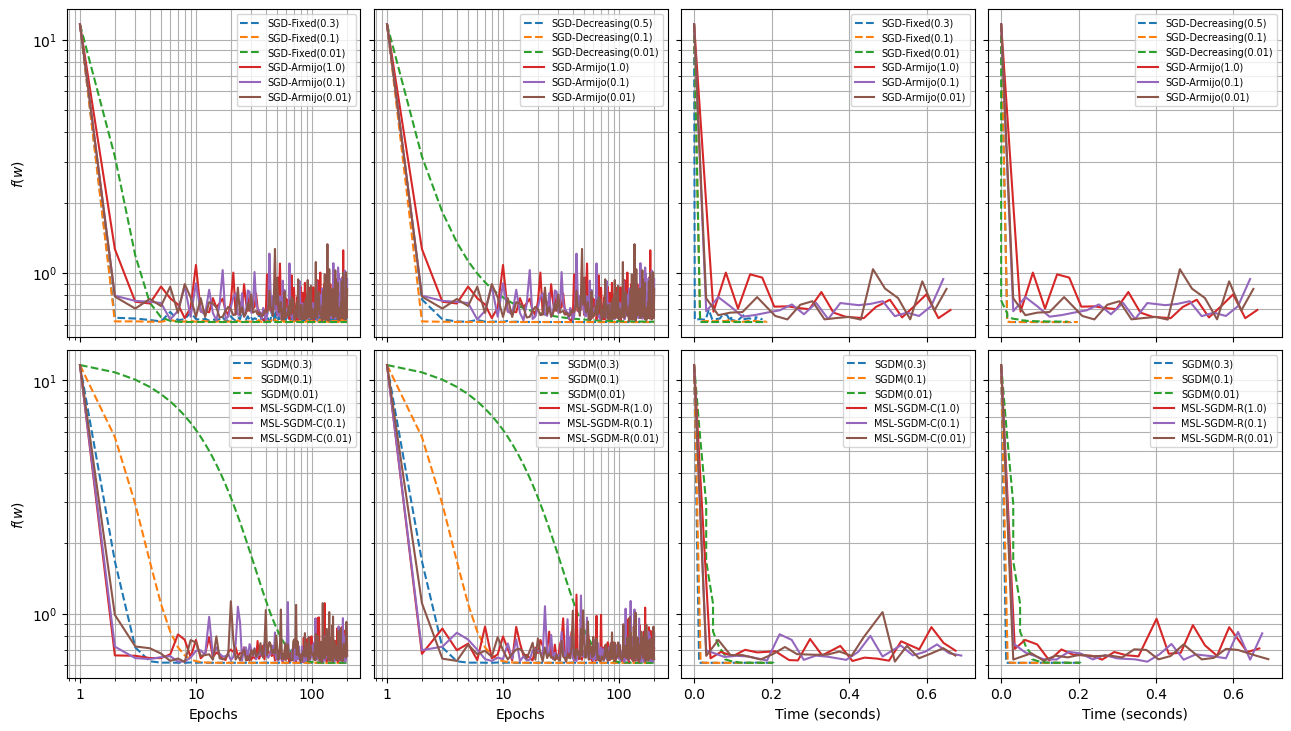

In [81]:
diagnostic(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-diagnostic.pdf")

## Fine-tuning

In [82]:
batchfixed_austr1 = LogisticRegression("SGD-Fixed", C).fit(data_austr, ktuning, data_austr[1].size, 0.2, stop=1)

In [83]:
sgdfixed_austr1 = LogisticRegression("SGD-Fixed", C).fit(data_austr, ktuning, MAustr, 0.001, stop=1)

In [84]:
sgddecre_austr1 = LogisticRegression("SGD-Decreasing", C).fit(data_austr, ktuning, MAustr, 0.05, stop=1)

In [85]:
sgdm_austr1 = LogisticRegression("SGDM", C).fit(data_austr, ktuning, MAustr, 0.02, 0.9, stop=1)

In [86]:
sgdarmijo_austr1 = LogisticRegression("SGD-Armijo", C).fit(data_austr, ktuning, MAustr, 0.01, stop=1)

In [87]:
mslc_austr1 = LogisticRegression("MSL-SGDM-C", C).fit(data_austr, ktuning, MAustr, 0.75, 0.9, stop=1)

In [88]:
mslr_austr1 = LogisticRegression("MSL-SGDM-R", C).fit(data_austr, ktuning, MAustr, 0.75, 0.9, stop=1)

In [89]:
fine_austr_data = optim_data([batchfixed_austr1, sgdfixed_austr1, sgddecre_austr1, sgdm_austr1, sgdarmijo_austr1, mslc_austr1, mslr_austr1])

test_austr = models_summary(fine_austr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])
test_austr

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.335335
2,CG,1,NaN,NaN,NaN,0.615582,0.000002,NaN,11,0.855072,0.876812,0.335334
0,L-BFGS-B,1,NaN,NaN,NaN,0.615582,0.000004,NaN,8,0.855072,0.876812,0.335337
3,SGD-Fixed,1,552.0,0.200,0.0,0.615582,0.000809,0.015736,37,0.855072,0.876812,0.335307
5,SGD-Decreasing,1,8.0,0.050,0.0,0.615582,0.000907,0.012544,18,0.855072,0.876812,0.335442
6,SGDM,1,8.0,0.020,0.9,0.615582,0.000939,0.200679,190,0.855072,0.876812,0.335041
4,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000967,0.110897,118,0.855072,0.876812,0.335339
9,MSL-SGDM-R,1,8.0,0.750,0.9,0.694137,0.547284,1.348897,400,0.588768,0.456522,0.341392
8,MSL-SGDM-C,1,8.0,0.750,0.9,0.696512,0.442114,1.381107,400,0.675725,0.666667,0.348912
7,SGD-Armijo,1,8.0,0.010,0.0,1.144364,1.435203,1.316624,400,0.463768,0.369565,0.738084


In [90]:
print(test_austr[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.615582 & 0.000001 & 0.876812 \\
CG & NaN & 11 & NaN & 0.615582 & 0.000002 & 0.876812 \\
L-BFGS-B & NaN & 8 & NaN & 0.615582 & 0.000004 & 0.876812 \\
SGD-Fixed & 0.200000 & 37 & 0.015736 & 0.615582 & 0.000809 & 0.876812 \\
SGD-Decreasing & 0.050000 & 18 & 0.012544 & 0.615582 & 0.000907 & 0.876812 \\
SGDM & 0.020000 & 190 & 0.200679 & 0.615582 & 0.000939 & 0.876812 \\
SGD-Fixed & 0.001000 & 118 & 0.110897 & 0.615582 & 0.000967 & 0.876812 \\
MSL-SGDM-R & 0.750000 & 400 & 1.348897 & 0.694137 & 0.547284 & 0.456522 \\
MSL-SGDM-C & 0.750000 & 400 & 1.381107 & 0.696512 & 0.442114 & 0.666667 \\
SGD-Armijo & 0.010000 & 400 & 1.316624 & 1.144364 & 1.435203 & 0.369565 \\
\bottomrule
\end{tabular}



# Mushrooms

In [16]:
data_mush = load_mushrooms()

________________________________________________________________________________
[Memory] Calling load_datasets.load_mushrooms...
load_mushrooms()
X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}
sklearn train score: 1.000000
sklearn test score: 1.000000
sklearn sol norm: 11.74605798576869
___________________________________________________load_mushrooms - 0.0s, 0.0min


In [17]:
#Cmush = 1
Mmush = 64
#kmush = 200
print(f"Iterations: {data_mush[1].size / Mmush}")

Iterations: 101.546875


## Benchmark

In [18]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## SGD

In [19]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, kdiagnostic, data_mush[1].size, (1, 0.1, 0.01))

In [29]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01))

In [30]:
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01))

In [31]:
# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [23]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01))

In [24]:
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [25]:
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, kdiagnostic, Mmush, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [26]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [32]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,6499.0,0.10,0.0,0.580925,3.551600e-09,0.185664,200,0.892291,0.886154,0.399399
1,Newton-CG,1,NaN,NaN,NaN,0.580925,1.380831e-04,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS-B,1,NaN,NaN,NaN,0.580925,6.046219e-06,NaN,9,0.892291,0.886154,0.399396
2,CG,1,NaN,NaN,NaN,0.580925,2.245995e-05,NaN,10,0.892291,0.886154,0.399402
10,SGD-Decreasing,1,64.0,0.10,0.0,0.580925,2.539729e-04,1.392601,200,0.892291,0.886154,0.399418
9,SGD-Decreasing,1,64.0,0.50,0.0,0.580925,7.294569e-04,1.413913,200,0.892291,0.886154,0.399631
14,SGDM,1,64.0,0.01,0.9,0.580925,1.013412e-03,1.457659,200,0.892445,0.886769,0.399487
13,SGDM,1,64.0,0.10,0.9,0.580928,2.679719e-03,1.456862,200,0.892599,0.886154,0.399593
8,SGD-Fixed,1,64.0,0.01,0.0,0.580936,6.334303e-03,1.408635,200,0.892291,0.886769,0.401204
12,SGDM,1,64.0,0.30,0.9,0.580994,1.810238e-02,1.433770,200,0.892599,0.887385,0.400372


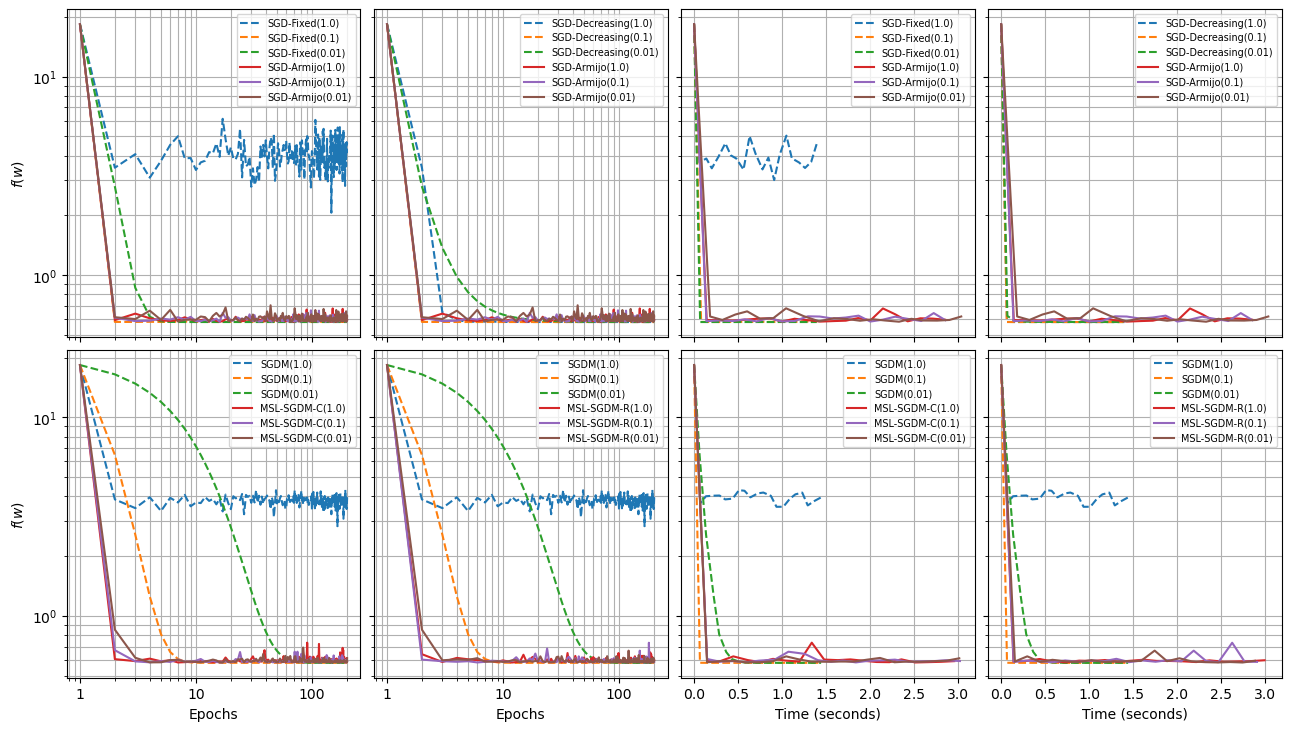

In [33]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

## Fine-tuning

In [34]:
batchfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, ktuning, data_mush[1].size, 0.05, stop=1)

In [35]:
sgdfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, ktuning, Mmush, 0.001, stop=1)

In [36]:
sgddecre_mush1 = LogisticRegression("SGD-Decreasing", C).fit(data_mush, ktuning, Mmush, 0.1, stop=1)

In [37]:
sgdm_mush1 = LogisticRegression("SGDM", C).fit(data_mush, ktuning, Mmush, 0.03, 0.9, stop=1)

In [38]:
sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", C).fit(data_mush, ktuning, Mmush, 0.01, stop=1)

In [39]:
mslc_mush1 = LogisticRegression("MSL-SGDM-C", C).fit(data_mush, ktuning, Mmush, 0.025, 0.9, stop=1)

In [40]:
mslr_mush1 = LogisticRegression("MSL-SGDM-R", C).fit(data_mush, ktuning, Mmush, 0.025, 0.9, stop=1)

In [41]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS-B,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.399396
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.399402
4,SGD-Fixed,1,64.0,0.001,0.0,0.580925,0.000755,0.633452,90,0.892291,0.886154,0.399387
6,SGDM,1,64.0,0.030,0.9,0.580925,0.000988,0.516922,72,0.892445,0.886154,0.399404
5,SGD-Decreasing,1,64.0,0.100,0.0,0.580925,0.000996,0.185108,26,0.892445,0.886154,0.399287
3,SGD-Fixed,1,6499.0,0.050,0.0,0.580925,0.000977,0.174660,168,0.892291,0.886154,0.399376
7,SGD-Armijo,1,64.0,0.010,0.0,0.586096,0.113630,5.710403,400,0.892445,0.887385,0.389547
8,MSL-SGDM-C,1,64.0,0.025,0.9,0.591362,0.176735,5.835203,400,0.910294,0.902769,0.397285
9,MSL-SGDM-R,1,64.0,0.025,0.9,0.598541,0.237303,5.783230,400,0.893214,0.890462,0.416715


In [112]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 8 & NaN & 0.580925 & 0.000000 & 0.886154 \\
L-BFGS-B & NaN & 10 & NaN & 0.580925 & 0.000013 & 0.886154 \\
CG & NaN & 9 & NaN & 0.580925 & 0.000029 & 0.886154 \\
SGDM & 0.030000 & 72 & 0.238051 & 0.580925 & 0.000995 & 0.886154 \\
SGD-Decreasing & 0.100000 & 26 & 0.062094 & 0.580925 & 0.000996 & 0.886154 \\
SGD-Fixed & 0.001000 & 93 & 0.228721 & 0.580925 & 0.000999 & 0.886154 \\
SGD-Fixed & 0.050000 & 182 & 0.656899 & 0.580925 & 0.000950 & 0.886154 \\
MSL-SGDM-C & 0.025000 & 400 & 3.558949 & 0.589190 & 0.205222 & 0.894769 \\
MSL-SGDM-R & 0.025000 & 400 & 3.670156 & 0.601514 & 0.355700 & 0.861538 \\
SGD-Armijo & 0.010000 & 400 & 3.353556 & 0.668386 & 0.756245 & 0.654769 \\
\bottomrule
\end{tabular}



# German

In [113]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}
sklearn train score: 0.782500
sklearn test score: 0.780000
sklearn sol norm: 2.3059775145851873


In [114]:
#Cgerman = 1
Mgerman = 8
#kgerman = 200
print(f"Iterations: {data_german[1].size / Mgerman}")

Iterations: 100.0


## Benchmark

In [115]:
benchgerman = run_bench(data_german, C)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [116]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, data_german, kdiagnostic, data_german[1].size, (1, 0.1, 0.01))

In [117]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, data_german, kdiagnostic, Mgerman, (0.3, 0.1, 0.01))

In [118]:
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, data_german, kdiagnostic, Mgerman, (0.5, 0.1, 0.01))

In [119]:
# SGDM
sgdm_german = run_solvers("SGDM", C, data_german, kdiagnostic, Mgerman, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [120]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, data_german, kdiagnostic, Mgerman, (1, 0.1, 0.01))

In [121]:
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, data_german, kdiagnostic, Mgerman, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [122]:
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, data_german, kdiagnostic, Mgerman, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [123]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [124]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,800.0,0.10,0.0,0.619120,2.052788e-09,0.078084,200,0.70125,0.700,0.248182
1,Newton-CG,1,NaN,NaN,NaN,0.619120,5.204715e-07,NaN,8,0.70125,0.700,0.248182
0,L-BFGS-B,1,NaN,NaN,NaN,0.619120,1.789223e-06,NaN,8,0.70125,0.700,0.248182
2,CG,1,NaN,NaN,NaN,0.619120,1.432839e-05,NaN,10,0.70125,0.700,0.248185
10,SGD-Decreasing,1,8.0,0.10,0.0,0.619120,2.758767e-04,0.437846,200,0.70125,0.700,0.248196
14,SGDM,1,8.0,0.01,0.9,0.619122,2.248891e-03,0.344918,200,0.70125,0.700,0.248210
9,SGD-Decreasing,1,8.0,0.50,0.0,0.619124,4.778694e-03,0.406691,200,0.70125,0.700,0.246663
11,SGD-Decreasing,1,8.0,0.01,0.0,0.619197,1.268976e-02,0.411619,200,0.70125,0.700,0.248137
13,SGDM,1,8.0,0.10,0.9,0.619213,2.225652e-02,0.435031,200,0.70125,0.700,0.243202
8,SGD-Fixed,1,8.0,0.01,0.0,0.619341,3.317112e-02,0.409548,200,0.70125,0.700,0.236644


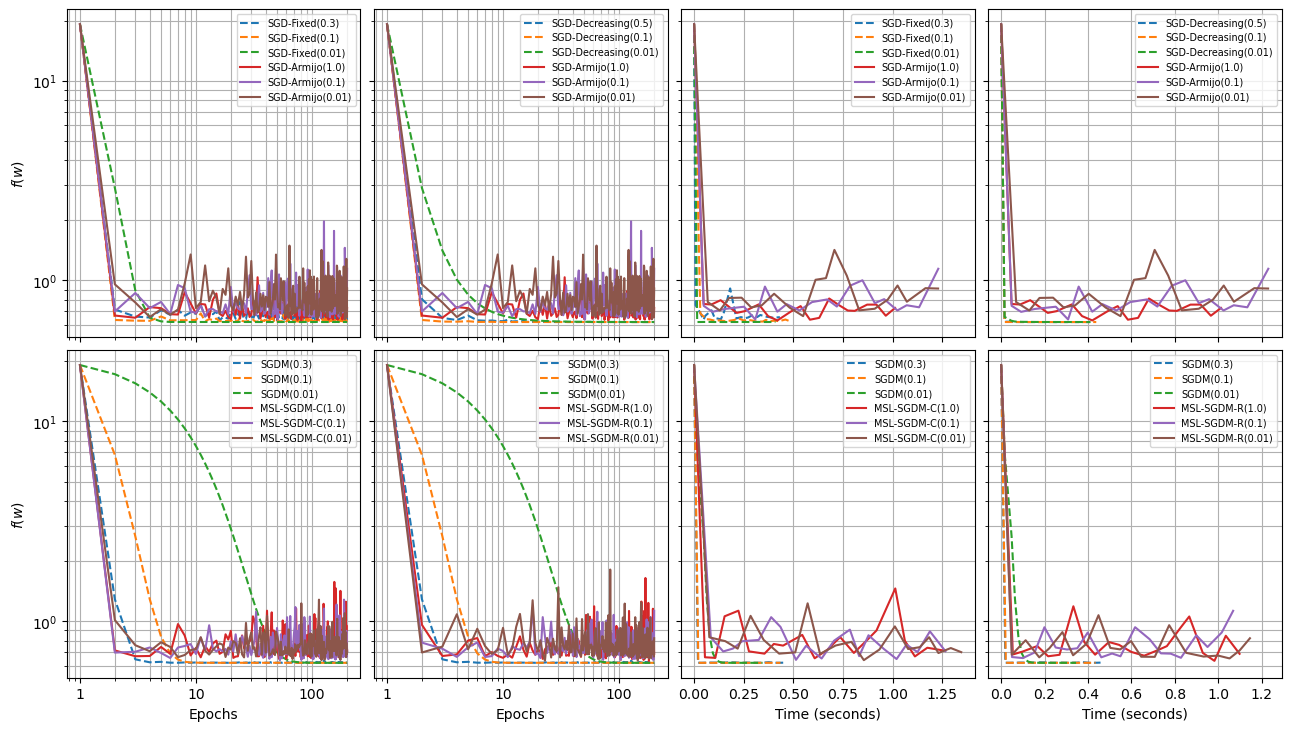

In [125]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

## Fine-tuning

In [126]:
batchfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, ktuning, data_german[1].size, 0.5, stop=1)

In [127]:
sgdfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, ktuning, Mgerman, 0.001, stop=1)

In [128]:
sgddecre_german1 = LogisticRegression("SGD-Decreasing", C).fit(data_german, ktuning, Mgerman, 0.25, stop=1)

In [129]:
sgdm_german1 = LogisticRegression("SGDM", C).fit(data_german, ktuning, Mgerman, 0.005, 0.9, stop=1)

In [130]:
sgdarmijo_german1 = LogisticRegression("SGD-Armijo", C).fit(data_german, ktuning, Mgerman, 0.05, stop=1)

In [131]:
mslc_german1 = LogisticRegression("MSL-SGDM-C", C).fit(data_german, ktuning, Mgerman, 0.5, 0.9, stop=1)

In [132]:
mslr_german1 = LogisticRegression("MSL-SGDM-R", C).fit(data_german, ktuning, Mgerman, 0.5, 0.9, stop=1)

In [133]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,5.204715e-07,NaN,8,0.70125,0.700,0.248182
0,L-BFGS-B,1,NaN,NaN,NaN,0.619120,1.789223e-06,NaN,8,0.70125,0.700,0.248182
2,CG,1,NaN,NaN,NaN,0.619120,1.432839e-05,NaN,10,0.70125,0.700,0.248185
4,SGD-Fixed,1,8.0,0.001,0.0,0.619120,4.938902e-04,0.175313,96,0.70125,0.700,0.248183
5,SGD-Decreasing,1,8.0,0.250,0.0,0.619121,8.989069e-04,0.325449,161,0.70125,0.700,0.248040
6,SGDM,1,8.0,0.005,0.9,0.619121,8.579267e-04,0.856343,373,0.70125,0.700,0.248255
3,SGD-Fixed,1,800.0,0.500,0.0,0.619121,8.970760e-04,0.009358,12,0.70125,0.700,0.248174
7,SGD-Armijo,1,8.0,0.050,0.0,0.753878,6.150964e-01,2.282026,400,0.66000,0.695,0.504349
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.852998,9.014252e-01,2.400975,400,0.54875,0.570,0.558776
9,MSL-SGDM-R,1,8.0,0.500,0.9,1.005202,1.295752e+00,2.200583,400,0.42625,0.385,0.622558


In [134]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 8 & NaN & 0.619120 & 0.000001 & 0.700000 \\
L-BFGS-B & NaN & 8 & NaN & 0.619120 & 0.000002 & 0.700000 \\
CG & NaN & 10 & NaN & 0.619120 & 0.000014 & 0.700000 \\
SGD-Fixed & 0.001000 & 96 & 0.175313 & 0.619120 & 0.000494 & 0.700000 \\
SGD-Decreasing & 0.250000 & 161 & 0.325449 & 0.619121 & 0.000899 & 0.700000 \\
SGDM & 0.005000 & 373 & 0.856343 & 0.619121 & 0.000858 & 0.700000 \\
SGD-Fixed & 0.500000 & 12 & 0.009358 & 0.619121 & 0.000897 & 0.700000 \\
SGD-Armijo & 0.050000 & 400 & 2.282026 & 0.753878 & 0.615096 & 0.695000 \\
MSL-SGDM-C & 0.500000 & 400 & 2.400975 & 0.852998 & 0.901425 & 0.570000 \\
MSL-SGDM-R & 0.500000 & 400 & 2.200583 & 1.005202 & 1.295752 & 0.385000 \\
\bottomrule
\end{tabular}

